<a href="https://colab.research.google.com/github/Aviad-Hedvat/ML---Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports
First of all I am going to import all relevant libraries that I'm foing to use while the assignment but, there may be more imports later.

In [18]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# define plt & sns settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


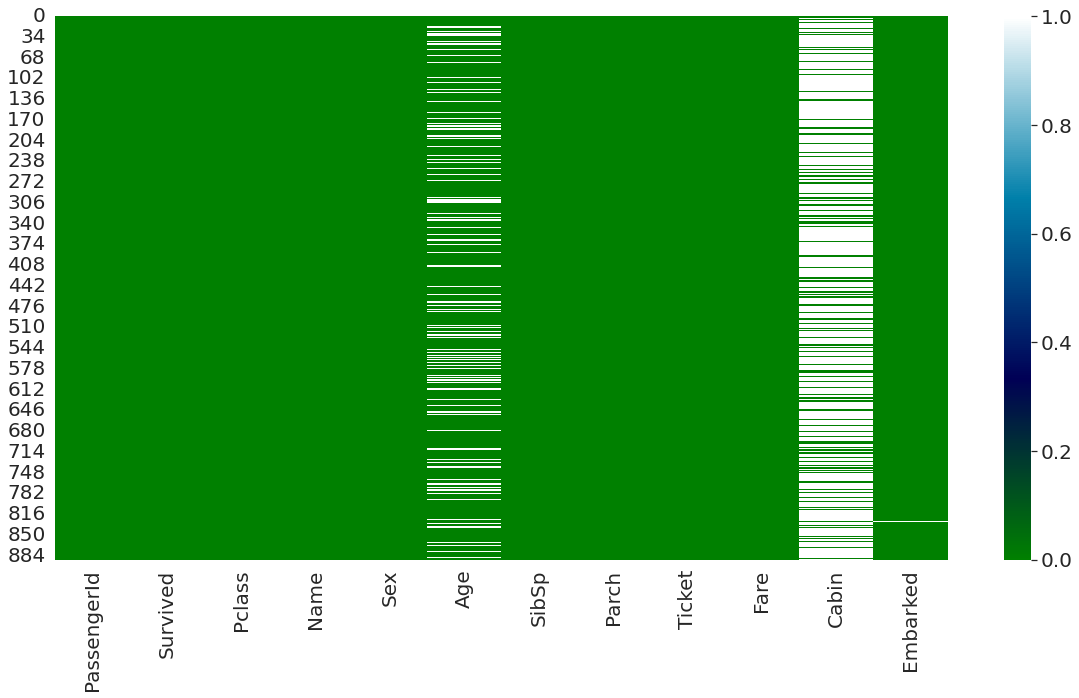

In [20]:
titanic_train = pd.read_csv(r'./train.csv')
print(titanic_train.info())
sns.heatmap(data=titanic_train.isnull(), cmap='ocean')

In [5]:
titanic_train.replace('', np.NaN, inplace=True)
titanic_train.fillna(np.NaN, inplace=True)

In [6]:
mean_age = round(titanic_train['Age'].dropna().mean()) #mean age of existed ages in the data
titanic_train['Age'].fillna(mean_age, inplace=True)
df_not_null = titanic_train[~titanic_train['Embarked'].isnull()]
options = np.random.choice(df_not_null['Embarked']) #get random value of all possibles values in Embarked feature
titanic_train['Embarked'] = titanic_train['Embarked'].apply( \
lambda x: options if pd.isnull(x) else x)

In [7]:
binary_cabin = [1 if str(x) != 'nan' else 0 for x in titanic_train['Cabin'].tolist()]
titanic_train.replace(titanic_train['Cabin'].tolist(), binary_cabin, inplace=True)
relatives = [x+y for x,y in zip(titanic_train['SibSp'], titanic_train['Parch'])]
titanic_train['Relatives'] = relatives
relatives_chance = titanic_train[['Relatives', 'Survived']].groupby(['Relatives'], as_index=False).mean()

In [8]:
# Extract the name titles
titles = titanic_train['Name'].str.extract(' ([a-zA-Z]+)\.')
titanic_train['Title'] = titles
# The following titles only appear a short amount so lets just merge them into one category
titanic_train['Title'] = titanic_train['Title'].replace(['Capt', 'Col', 'Dr', 'Lady', 'Rev', 'Dona', \
'Mme', 'Countess', 'Don', 'Major', 'Sir', 'Jonkheer', 'Mlle'], 'Other')
titanic_train['Title'] = titanic_train['Title'].replace('Ms', 'Miss')
# 'Ms title only appears a few times and she always survives so i'm just gonna merge it with Miss - same meaning anyway
# Show a table of the mean of people who survived by title.
rate = titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
titanic_train.replace(dict([(x,y) for x,y in zip(rate['Title'], rate['Survived'])]), inplace=True)
# replace the titles with the acording survival mean from the table we got above!

In [10]:
from sklearn.preprocessing import MinMaxScaler #for data standartization - for Age and Fare

embarked_chance = titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
new_sex = [1 if x=='female' else 0 for x in titanic_train['Sex']] 
titanic_train.replace(titanic_train['Sex'].tolist(), new_sex, inplace=True)
titanic_train.replace(dict([(x,y) for x,y in \
zip(embarked_chance['Embarked'], embarked_chance['Survived'])]), inplace=True)

mm_scaler = MinMaxScaler()
age_fare = mm_scaler.fit_transform(titanic_train[['Age', 'Fare']])
titanic_train['Age'] = age_fare.copy()
titanic_train['Fare'] = age_fare.copy()

fpc = [(x/y) + z for x,y,z in zip(titanic_train['Fare'], titanic_train['Pclass'], titanic_train['Cabin'])]
titanic_train['FPC'] = fpc
lonely = [1 if x==0 else 0 for x in titanic_train['Relatives']]
titanic_train['Lonely'] = lonely
titanic_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [11]:
from sklearn import model_selection
t = titanic_train['Survived'].copy()
titanic_train.drop('Survived', axis=1, inplace=True)
x_train, x_val, y_train, y_val = model_selection.train_test_split(titanic_train, t, test_size=0.2, random_state=42)

In [12]:
from sklearn import neural_network, linear_model

lr_model = linear_model.LogisticRegression().fit(x_train, y_train)
sgd_model = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=50000)\
.fit(x_train, y_train)

In [13]:
model = linear_model.LogisticRegression().fit(titanic_train, t)

In [14]:
def prepare_data(df: pd.DataFrame):
    df.replace('', np.NaN, inplace=True)
    df.fillna(np.NaN, inplace=True)
    binary_cabin = [1 if str(x) != 'nan' else 0 for x in df['Cabin'].tolist()]
    df.replace(df['Cabin'].tolist(), binary_cabin, inplace=True)
    relatives = [x+y for x,y in zip(df['SibSp'], df['Parch'])]
    df['Relatives'] = relatives
    titles = df['Name'].str.extract(' ([a-zA-Z]+)\.')
    df['Title'] = titles
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Dr', 'Lady', 'Rev', 'Dona', \
    'Mme', 'Countess', 'Don', 'Major', 'Sir', 'Jonkheer', 'Mlle'], 'Other')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df.replace(dict([(x,y) for x,y in zip(rate['Title'], rate['Survived'])]), inplace=True)
    new_sex = [1 if x=='female' else 0 for x in df['Sex']]
    df.replace(df['Sex'].tolist(), new_sex, inplace=True)
    df.replace(dict([(x,y) for x,y in zip(embarked_chance['Embarked'], embarked_chance['Survived'])]), inplace=True)

    age_fare = mm_scaler.fit_transform(df[['Age', 'Fare']])
    df['Age'] = age_fare.copy()
    df['Fare'] = age_fare.copy()

    fpc = [(x/y) + z for x,y,z in zip(df['Fare'], df['Pclass'], df['Cabin'])]
    df['FPC'] = fpc
    lonely = [1 if x==0 else 0 for x in df['Relatives']]
    df['Lonely'] = lonely
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [16]:
test_data = pd.read_csv(r'./test.csv')
#Fare is missing so I just add a mean, everything else as I did before for age and cabin
mean_age = round(test_data['Age'].dropna().mean())
test_data['Age'].fillna(mean_age, inplace=True)
fare_mean = round(test_data['Fare'].dropna().mean())
test_data['Fare'].fillna(fare_mean, inplace=True)

# now I can pass it safely to the function we created and it will handle it propertly.
prepare_data(test_data)

In [17]:
prediction = pd.read_csv(r'./test.csv')
prediction['Survived'] = model.predict(test_data)
prediction = prediction[['PassengerId', 'Survived']]
prediction.to_csv(r'./submission.csv', index=False)